In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dataset

In [3]:
import json

with open('food_articles.json') as f:
  data = json.load(f)

In [51]:
headers = data[0].keys()
headers

dict_keys(['article_header', 'article_url', 'article_date_published', 'article_text', 'tags'])

In [393]:
for key in data:
    header = key['article_header']
    #print(header)

In [74]:
df = pd.DataFrame.from_dict(data)

In [75]:
df.head()

,article_header,article_url,article_date_published,article_text,tags
0,[Comfort with a twist trend prevalent at Winte...,https://www.foodbusinessnews.net/articles/2072...,[02.21.2022],"CHICAGO — Dairy cheese, whether it comes from ...","[Ingredient Applications, Trends, Dairy]"
1,[ADM identifies seven alternative protein trends],https://www.foodbusinessnews.net/articles/2064...,[02.10.2022],CHICAGO — ADM has identified seven consumer tr...,"[Trends, Plant Protein]"
2,[Sizing up snacking trends],https://www.foodbusinessnews.net/articles/2052...,[01.26.2022],CHICAGO — Consumers’ preference for snacking a...,"[Business, Trends, Mondelez International, Sna..."
3,[Targeting breakfast food for all morning occa...,https://www.foodbusinessnews.net/articles/2060...,[02.04.2022],CHICAGO — Companies could increase breakfast p...,[Trends]
4,[Webinar: Flavor trends to watch in 2022],https://www.foodbusinessnews.net/articles/2053...,[01.26.2022],KANSAS CITY — What flavor trends are on tap fo...,"[Trends, Flavors]"


In [76]:
#tidying up the data by removing instances of closed brackets 

df['article_date_published'] = df['article_date_published'].str[0]
df['article_header'] = df['article_header'].str[0]
df['tags'] = df['tags'].str[0]
df.head()

,article_header,article_url,article_date_published,article_text,tags
0,Comfort with a twist trend prevalent at Winter...,https://www.foodbusinessnews.net/articles/2072...,02.21.2022,"CHICAGO — Dairy cheese, whether it comes from ...",Ingredient Applications
1,ADM identifies seven alternative protein trends,https://www.foodbusinessnews.net/articles/2064...,02.10.2022,CHICAGO — ADM has identified seven consumer tr...,Trends
2,Sizing up snacking trends,https://www.foodbusinessnews.net/articles/2052...,01.26.2022,CHICAGO — Consumers’ preference for snacking a...,Business
3,Targeting breakfast food for all morning occas...,https://www.foodbusinessnews.net/articles/2060...,02.04.2022,CHICAGO — Companies could increase breakfast p...,Trends
4,Webinar: Flavor trends to watch in 2022,https://www.foodbusinessnews.net/articles/2053...,01.26.2022,KANSAS CITY — What flavor trends are on tap fo...,Trends


In [78]:
df.columns

Index(['article_header', 'article_url', 'article_date_published',
       'article_text', 'tags'],
      dtype='object')

In [79]:
#converting the article_date_published column to datetime

df['article_date_published'] =  pd.to_datetime(df['article_date_published'], infer_datetime_format=True)


In [83]:
df.set_index('article_date_published').sort_index()

,article_header,article_url,article_text,tags
article_date_published,,,,
2012-08-08,New global food paradigm advocated,https://www.foodbusinessnews.net/articles/129-...,ROME — A paradigm shift in favor of food biodi...,Trends
2012-08-13,Cholesterol levels in youth decline,https://www.foodbusinessnews.net/articles/45-c...,CHICAGO — The average cholesterol levels in U....,Trends
2012-08-15,Prevalence of adult obesity remained high in 2011,https://www.foodbusinessnews.net/articles/146-...,ATLANTA — New data published by the Centers fo...,Trends
2012-08-22,Cornell study shows stickers may help sell fruits,https://www.foodbusinessnews.net/articles/51-c...,"ITHACA, N.Y. — A new study from researchers at...",Trends
2012-08-22,Schools work creatively to meet nutrition stan...,https://www.foodbusinessnews.net/articles/155-...,"NATIONAL HARBOR, MD. — New federal nutrition s...",Trends
...,...,...,...,...
2022-02-18,"Gen Z, millennials seek comfort with a side of...",https://www.foodbusinessnews.net/articles/2071...,NEW YORK — Young adults plan to balance their ...,Trends
2022-02-21,Comfort with a twist trend prevalent at Winter...,https://www.foodbusinessnews.net/articles/2072...,"CHICAGO — Dairy cheese, whether it comes from ...",Ingredient Applications
NaT,NaN,https://www.nxtbook.com/sosland/adm/adm-global...,,NaN


In [86]:
# Finding instances of NaN values

df.isna().sum()

article_header            3
article_url               0
article_date_published    3
article_text              0
tags                      3
dtype: int64

In [92]:
df_clean = df.dropna()

In [93]:
df_clean.set_index('article_date_published').sort_index()

,article_header,article_url,article_text,tags
article_date_published,,,,
2012-08-08,New global food paradigm advocated,https://www.foodbusinessnews.net/articles/129-...,ROME — A paradigm shift in favor of food biodi...,Trends
2012-08-13,Cholesterol levels in youth decline,https://www.foodbusinessnews.net/articles/45-c...,CHICAGO — The average cholesterol levels in U....,Trends
2012-08-15,Prevalence of adult obesity remained high in 2011,https://www.foodbusinessnews.net/articles/146-...,ATLANTA — New data published by the Centers fo...,Trends
2012-08-22,Cornell study shows stickers may help sell fruits,https://www.foodbusinessnews.net/articles/51-c...,"ITHACA, N.Y. — A new study from researchers at...",Trends
2012-08-22,Schools work creatively to meet nutrition stan...,https://www.foodbusinessnews.net/articles/155-...,"NATIONAL HARBOR, MD. — New federal nutrition s...",Trends
...,...,...,...,...
2022-02-08,Trends spotted at the Winter Fancy Food Show,https://www.foodbusinessnews.net/articles/2063...,"LAS VEGAS — Kelp, cactus and hemp are among th...",Trends
2022-02-10,ADM identifies seven alternative protein trends,https://www.foodbusinessnews.net/articles/2064...,CHICAGO — ADM has identified seven consumer tr...,Trends
2022-02-16,FrieslandCampina forecasts 2022 nutrition trends,https://www.foodbusinessnews.net/articles/2069...,"AMERSFOORT, THE NETHERLANDS — FrieslandCampina...",Trends


In [562]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2282 entries, 0 to 2284
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   article_header            2282 non-null   object        
 1   article_url               2282 non-null   object        
 2   article_date_published    2282 non-null   datetime64[ns]
 3   article_text              2282 non-null   object        
 4   tags                      2282 non-null   object        
 5   article_text_processed    2282 non-null   object        
 6   article_header_processed  2282 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 207.2+ KB


In [565]:
df_clean.tags.value_counts()

Trends                     674
Ingredient Applications    383
Food Products              368
Business                   353
Companies                  221
Operations                 131
Sales Channels             117
Ingredient Markets          31
Latest News                  4
Name: tags, dtype: int64

In [108]:
df_clean['article_text'][:10]

0    CHICAGO — Dairy cheese, whether it comes from ...
1    CHICAGO — ADM has identified seven consumer tr...
2    CHICAGO — Consumers’ preference for snacking a...
3    CHICAGO — Companies could increase breakfast p...
4    KANSAS CITY — What flavor trends are on tap fo...
5    LAS VEGAS — Kelp, cactus and hemp are among th...
6    NEW YORK — Online grocery shopping is more pop...
7    ST. PETERSBURG, FLA. — New private label produ...
8    AMERSFOORT, THE NETHERLANDS — FrieslandCampina...
9    NEW YORK — Young adults plan to balance their ...
Name: article_text, dtype: object

In [246]:
df_clean.head()

,article_header,article_url,article_date_published,article_text,tags
0,Comfort with a twist trend prevalent at Winter...,https://www.foodbusinessnews.net/articles/2072...,2022-02-21,"CHICAGO — Dairy cheese, whether it comes from ...",Ingredient Applications
1,ADM identifies seven alternative protein trends,https://www.foodbusinessnews.net/articles/2064...,2022-02-10,CHICAGO — ADM has identified seven consumer tr...,Trends
2,Sizing up snacking trends,https://www.foodbusinessnews.net/articles/2052...,2022-01-26,CHICAGO — Consumers’ preference for snacking a...,Business
3,Targeting breakfast food for all morning occas...,https://www.foodbusinessnews.net/articles/2060...,2022-02-04,CHICAGO — Companies could increase breakfast p...,Trends
4,Webinar: Flavor trends to watch in 2022,https://www.foodbusinessnews.net/articles/2053...,2022-01-26,KANSAS CITY — What flavor trends are on tap fo...,Trends


### Analysis

In [634]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FaridSarwari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [635]:
# Tools for plotting 

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [636]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [637]:
# spacy for lemmatization


import spacy

### Preprocessing

In [573]:
data = list(df_clean.article_text)
data[:2]

['CHICAGO —\xa0Dairy cheese, whether it comes from cows, goats or sheep, along with plant-based varieties were plentiful at the Winter Fancy Food Show, held Feb. 6-8 in Las Vegas. The event marked the Specialty Food Association’s first live trade show in two years. While cheese dominated the dairy space, premium butters and frozen desserts also could be found among the more than 800 specialty food exhibiting companies. The prominent theme of the show was comfort foods with a twist. Such products speak to consumers who continue to seek new yet familiar experiences at home amid the ongoing pandemic.The $170.4 billion specialty food industry encompasses foods and beverages, and their specialty nature includes attributes such as exotic origin, particular processing (and often an intentional lack thereof), design, limited supply, unusual application/use, compelling packaging or channel of distribution/sale.In 2020, specialty food sales accounted for 21.5% of all food and beverage sales. Che

In [574]:
stop_words = nltk.corpus.stopwords.words('english')

### Build the Bigram, Trigram Models and Lemmatize


In [638]:
# Build the bigram and trigrams
bigram = gensim.models.Phrases(data, min_count=20, threshold=100)
trigram = gensim.models.Phrases(bigram[data], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

2022-08-12 09:06:00,530 | INFO | phrases.py:583 | _learn_vocab | collecting all words and their counts
2022-08-12 09:06:00,532 | INFO | phrases.py:586 | _learn_vocab | PROGRESS: at sentence #0, processed 0 words and 0 word types
2022-08-12 09:06:08,277 | INFO | phrases.py:607 | _learn_vocab | collected 4084 token types (unigram + bigrams) from a corpus of 7919783 words and 2282 sentences
2022-08-12 09:06:08,279 | INFO | phrases.py:666 | add_vocab | merged Phrases<4084 vocab, min_count=20, threshold=100, max_vocab_size=40000000>
2022-08-12 09:06:08,280 | INFO | utils.py:447 | add_lifecycle_event | Phrases lifecycle event {'msg': 'built Phrases<4084 vocab, min_count=20, threshold=100, max_vocab_size=40000000> in 7.75s', 'datetime': '2022-08-12T09:06:08.280823', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'created'}
2022-08-12 09:06:08,283 | INFO | phrases.py:583 | _learn_vocab | collect

In [639]:
# only need tagger, no need for parser and named entity recognizer, for faster implementation
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [640]:
def process_words(texts, stop_words=stop_words, allowed_tags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    
    """Convert a document into a list of lowercase tokens, build bigrams-trigrams, implement lemmatization"""
    
    # remove stopwords, short tokens and letter accents 
    texts = [[word for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words] for doc in texts]
    
    # bi-gram and tri-gram implementation
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    
    texts_out = []

    # implement lemmatization and filter out unwanted part of speech tags
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_tags])
    
    # remove stopwords and short tokens again after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words] for doc in texts_out]    
    
    return texts_out

In [577]:
data_ready = process_words(data) 

In [641]:
data_ready[0]

['dairy',
 'cheese',
 'come',
 'cow',
 'goat',
 'variety',
 'plentiful',
 'winter',
 'fancy',
 'show',
 'hold',
 'event',
 'mark',
 'specialty',
 'association',
 'first',
 'live',
 'trade',
 'show',
 'cheese',
 'dominate',
 'dairy',
 'space',
 'premium',
 'butter',
 'frozen',
 'dessert',
 'find',
 'specialty',
 'exhibit',
 'prominent',
 'theme',
 'show',
 'comfort',
 'twist',
 'speak',
 'continue',
 'seek',
 'yet',
 'familiar',
 'experience',
 'home',
 'ongoing',
 'pandemic',
 'specialty',
 'encompasse',
 'specialty',
 'nature',
 'attribute',
 'exotic',
 'origin',
 'particular',
 'processing',
 'often',
 'intentional',
 'lack',
 'thereof',
 'design',
 'limit',
 'supply',
 'unusual',
 'application',
 'compelling',
 'packaging',
 'channel',
 'distribution',
 'specialty',
 'account',
 'cheese',
 'long',
 'maintain',
 'position',
 'term',
 'dollar',
 'share',
 'state',
 'specialty',
 'publish',
 'poultry',
 'seafood',
 'freeze',
 'refrigerate',
 'oust',
 'cheese',
 'top',
 'spot',
 'exceed

Above we preprocess the corpus that includes:

- removing stop words,
- doing lemmatization,
- implementing ngrams,
- selection of tokens based on speech of tags (keep the words that are either noun, adjective, verb or adverb)

### Create the Dictionary and Corpus needed for Topic Modeling

In [650]:
import little_mallet_wrapper as lmw

In [ ]:
from gensim import models

In [642]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

print('Total Vocabulary Size:', len(id2word))

2022-08-12 09:06:33,727 | INFO | dictionary.py:199 | add_documents | adding document #0 to Dictionary(0 unique tokens: [])
2022-08-12 09:06:34,305 | INFO | dictionary.py:204 | add_documents | built Dictionary(16624 unique tokens: ['able', 'accompany', 'account', 'addition', 'age']...) from 2282 documents (total 494154 corpus positions)
2022-08-12 09:06:34,306 | INFO | utils.py:447 | add_lifecycle_event | Dictionary lifecycle event {'msg': "built Dictionary(16624 unique tokens: ['able', 'accompany', 'account', 'addition', 'age']...) from 2282 documents (total 494154 corpus positions)", 'datetime': '2022-08-12T09:06:34.306196', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'created'}


Total Vocabulary Size: 16624


##### After preprocessing step we form a dictionary that the model requires.

In [643]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [648]:
topics = [[(term, round(wt, 3)) for term, wt in ldamallet.show_topic(n, topn=20)] for n in range(0, ldamallet.num_topics)]

AttributeError: module 'little_mallet_wrapper' has no attribute 'num_topics'

In [583]:
dict_corpus = {}

for i in range(len(corpus)):
  for idx, freq in corpus[i]:
    if id2word[idx] in dict_corpus:
      dict_corpus[id2word[idx]] += freq
    else:
       dict_corpus[id2word[idx]] = freq
       
dict_df = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['freq'])

C:\Users\FaridSarwari\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


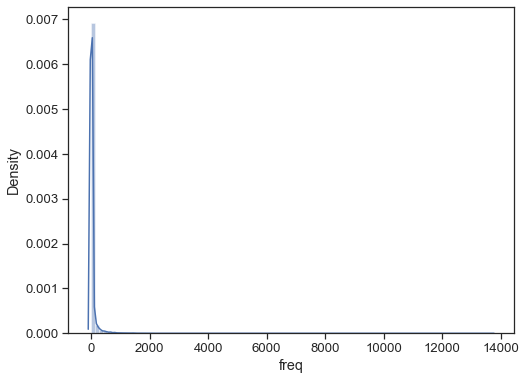

In [585]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.distplot(dict_df['freq'], bins=100);

In [592]:
dict_df.sort_values("freq", ascending=False).head(10)

,freq
say,13667
food,12208
consumer,8571
product,8289
company,4203
year,4138
ingredient,4113
flavor,4008
new,3601
make,3490


In [594]:
extension = dict_df[dict_df.freq>1500].index.tolist()

extension

['accord',
 'add',
 'also',
 'base',
 'beverage',
 'brand',
 'category',
 'company',
 'consumer',
 'flavor',
 'food',
 'grow',
 'high',
 'include',
 'increase',
 'industry',
 'ingredient',
 'make',
 'market',
 'meat',
 'new',
 'offer',
 'plant',
 'product',
 'sale',
 'say',
 'snack',
 'sugar',
 'use',
 'well',
 'whole',
 'year',
 'health',
 'protein',
 'trend',
 'eat',
 'free',
 'healthy',
 'natural',
 'nutrition',
 'organic',
 'people',
 'grain',
 'see']

In [595]:
# add high frequency words to stop words list
stop_words.extend(extension)

# rerun the process_words function
data_ready = process_words(data)

# recreate Dictionary
id2word = corpora.Dictionary(data_ready)

print('Total Vocabulary Size:', len(id2word))

2022-08-12 08:12:29,030 | INFO | dictionary.py:199 | add_documents | adding document #0 to Dictionary(0 unique tokens: [])
2022-08-12 08:12:29,491 | INFO | dictionary.py:204 | add_documents | built Dictionary(16624 unique tokens: ['able', 'accompany', 'account', 'addition', 'age']...) from 2282 documents (total 494154 corpus positions)
2022-08-12 08:12:29,493 | INFO | utils.py:447 | add_lifecycle_event | Dictionary lifecycle event {'msg': "built Dictionary(16624 unique tokens: ['able', 'accompany', 'account', 'addition', 'age']...) from 2282 documents (total 494154 corpus positions)", 'datetime': '2022-08-12T08:12:29.493994', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'created'}


Total Vocabulary Size: 16624


In [596]:
# Filter out words that occur less than 10 documents, or more than
# 50% of the documents.
id2word.filter_extremes(no_below=10, no_above=0.5)
print('Total Vocabulary Size:', len(id2word))

2022-08-12 08:12:35,991 | INFO | dictionary.py:367 | filter_extremes | discarding 12713 tokens: [('artful', 1), ('assemble', 9), ('awaken', 1), ('azul', 1), ('bathe', 1), ('belgioioso', 2), ('bellwether', 1), ('boba', 6), ('brie', 1), ('broker', 4)]...
2022-08-12 08:12:35,992 | INFO | dictionary.py:368 | filter_extremes | keeping 3911 tokens which were in no less than 10 and no more than 1141 (=50.0%) documents
2022-08-12 08:12:35,999 | INFO | dictionary.py:375 | filter_extremes | resulting dictionary: Dictionary(3911 unique tokens: ['able', 'accompany', 'account', 'addition', 'age']...)


Total Vocabulary Size: 3911


In [597]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

## Building the Model

In [599]:
import os 

os.getcwd()

'C:\\Users\\FaridSarwari\\OneDrive - BlueGem Capital Partners LLP\\Desktop\\Bluegem'

In [609]:
from collections import defaultdict
from datetime import datetime
import math
from operator import itemgetter
import os
import random
import re

import numpy as np
import pandas as pd

%matplotlib inline

import little_mallet_wrapper as lmw

In [610]:
path_to_mallet = "/mallet-2.0.8/bin/mallet"

In [611]:
df_clean.head()

,article_header,article_url,article_date_published,article_text,tags,article_text_processed,article_header_processed
0,Comfort with a twist trend prevalent at Winter Fancy Food Show,https://www.foodbusinessnews.net/articles/20724-comfort-with-a-twist-trend-prevalent-at-winter-f...,2022-02-21,"CHICAGO — Dairy cheese, whether it comes from cows, goats or sheep, along with plant-based varie...",Ingredient Applications,chicago dairy cheese whether it comes from cows goats or sheep along with plant-based varieties...,comfort with a twist trend prevalent at winter fancy food show
1,ADM identifies seven alternative protein trends,https://www.foodbusinessnews.net/articles/20643-adm-identifies-seven-alternative-protein-trends,2022-02-10,CHICAGO — ADM has identified seven consumer trends in the alternative protein category: novel pr...,Trends,chicago adm has identified seven consumer trends in the alternative protein category: novel pro...,adm identifies seven alternative protein trends
2,Sizing up snacking trends,https://www.foodbusinessnews.net/articles/20526-sizing-up-snacking-trends,2022-01-26,CHICAGO — Consumers’ preference for snacking as a regular eating behavior over traditional mealt...,Business,chicago consumers’ preference for snacking as a regular eating behavior over traditional mealti...,sizing up snacking trends
3,Targeting breakfast food for all morning occasions,https://www.foodbusinessnews.net/articles/20600-targeting-breakfast-food-for-all-morning-occasions,2022-02-04,CHICAGO — Companies could increase breakfast product sales by targeting items for each specific ...,Trends,chicago companies could increase breakfast product sales by targeting items for each specific m...,targeting breakfast food for all morning occasions
4,Webinar: Flavor trends to watch in 2022,https://www.foodbusinessnews.net/articles/20533-webinar-flavor-trends-to-watch-in-2022,2022-01-26,"KANSAS CITY — What flavor trends are on tap for the year ahead?In an exclusive, 30-minute webina...",Trends,kansas city what flavor trends are on tap for the year aheadin an exclusive 30-minute webinar t...,webinar: flavor trends to watch in 2022


In [613]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2282 entries, 0 to 2284
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   article_header            2282 non-null   object        
 1   article_url               2282 non-null   object        
 2   article_date_published    2282 non-null   datetime64[ns]
 3   article_text              2282 non-null   object        
 4   tags                      2282 non-null   object        
 5   article_text_processed    2282 non-null   object        
 6   article_header_processed  2282 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 207.2+ KB


In [614]:
training_data = [lmw.process_string(t) for t in df_clean['article_text'].tolist()]
training_data = [d for d in training_data if d.strip()]

len(training_data)

2182

In [615]:
training_data[10]

'washington reign continues mediterranean diet fifth straight year diet emphasizes fruit vegetables olive oil fish healthy food ranked NUM best diet overall news released best diet rankings NUM jan NUM mediterranean diet also named best diet healthy eating best diet diabetes best plant based diet easiest diet follow mediterranean diet ornish diet tied best heart healthy diet dash diet flexitarian diet tied NUM best diet overall flexitarian diet tied weight watchers volumetrics best weight loss diet also tied NUM best diet plans mayo clinic diet atkins rated best fast weight loss diet consumers increasingly choosing diets offer built community according news members noom diet ranked fourth best diet program assigned coach placed support group keto diet generated lot food news NUM packaged facts rockville found NUM consumers report following keto diet least sometimes yet keto diet finished NUM best diets overall rankings news influence diet health across life span cannot overstated espec

In [616]:
authors = df_clean['article_header'].tolist()

len(authors)

2282

In [617]:
lmw.print_dataset_stats(training_data)

Number of Documents: 2182
Mean Number of Words per Document: 358.3
Vocabulary Size: 27581


### Train Topic Model

In [627]:
num_topics = 20  # CHANGE THIS TO YOUR PREFERRED NUMBER OF TOPICS

output_directory_path = '/lmw-output' # CHANGE THIS TO YOUR OUTPUT DIRECTORY

path_to_training_data           = output_directory_path + '/training.txt'
path_to_formatted_training_data = output_directory_path + '/mallet.training'
path_to_model                   = output_directory_path + '/mallet.model.' + str(num_topics)
path_to_topic_keys              = output_directory_path + '/mallet.topic_keys.' + str(num_topics)
path_to_topic_distributions     = output_directory_path + '/mallet.topic_distributions.' + str(num_topics)
path_to_word_weights            = output_directory_path + '/mallet.word_weights.' + str(num_topics)
path_to_diagnostics             = output_directory_path + '/mallet.diagnostics.' + str(num_topics) + '.xml'

In [626]:
topic_keys, topic_distributions = lmw.quick_train_topic_model(path_to_mallet, 
                                                              output_directory_path, 
                                                              num_topics, 
                                                              training_data)

FileNotFoundError: [Errno 2] No such file or directory: '/topic-model-output/training.txt'

In [628]:
lmw.import_data(path_to_mallet,
                path_to_training_data,
                path_to_formatted_training_data,
                training_data)

FileNotFoundError: [Errno 2] No such file or directory: '/lmw-output/training.txt'

In [607]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

AttributeError: module 'gensim.models' has no attribute 'wrappers'

## TF-IDF

In [470]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit(df_clean['article_text_processed'])

TfidfVectorizer()

In [473]:
X = tfidf.transform(df_clean['article_text_processed'])
df_clean['article_text_processed'][1]

'chicago  adm has identified seven consumer trends in the alternative protein category: novel protein sources fermentation whole-muscle solutions transparency price parity child-friendly product formats and authentic cuisines the chicago-based company based its findings on research from its outside voice consumer insights platformfungi and air are examples of novel protein sources cell-based meat counts as well future meat technologies rehovot israel is working on cell-based meat made from cultivated animal cells the company is developing more efficient processes for manufacturing meat products at scale air particles volcanic ash seaweed and insects are all examples of novel protein sourcesmicrobial fermentation may be used to develop alternative proteins companies such as adm have fermentation capabilities to support food beverage and health and wellness brands with downstream processing lab services and consultations according to admwhole-muscle plant-based products such as chicken b

In [474]:
print([X[1, tfidf.vocabulary_['consumer']]])

[0.058017030987679206]


In [489]:
from sklearn.feature_selection import chi2

tfidf = TfidfVectorizer(max_features=30000,ngram_range=(1, 3))
X_tfidf = tfidf.fit_transform(df_clean['article_text_processed'])


## Topic Modelling -- Time Series 

In [446]:
path_to_mallet = 'mallet-2.0.8/bin/mallet'

In [516]:
from collections import defaultdict
from datetime import datetime
import math
from operator import itemgetter
import os
import random
import re

import numpy as np
import pandas as pd

%matplotlib inline

import little_mallet_wrapper as lmw

In [517]:
import os 

os.getcwd()

'C:\\Users\\FaridSarwari\\OneDrive - BlueGem Capital Partners LLP\\Desktop\\Bluegem'

In [518]:
path_to_mallet = "C:/Users/FaridSarwari/OneDrive - BlueGem Capital Partners LLP/Desktop/Bluegem/mallet-2.0.8"

In [519]:
training_data = [little_mallet_wrapper.process_string(text, numbers='remove') for text in df_clean['article_text']]

In [520]:
original_data = [title for title in df_clean['article_text']]

In [521]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 2282
Mean Number of Words per Document: 328.6
Vocabulary Size: 27507


In [522]:
lmw.print_dataset_stats(training_data)

Number of Documents: 2282
Mean Number of Words per Document: 328.6
Vocabulary Size: 27507


In [523]:
num_topics = 20  # CHANGE THIS TO YOUR PREFERRED NUMBER OF TOPICS

output_directory_path = 'C:/Users/FaridSarwari/OneDrive - BlueGem Capital Partners LLP/Desktop/Bluegem/topic-model-output/food_articles' # CHANGE THIS TO YOUR OUTPUT DIRECTORY

In [550]:
num_topics = 20 

topic_keys, topic_distributions = lmw.quick_train_topic_model(path_to_mallet, 
                                                              output_directory_path, 
                                                              num_topics, 
                                                              training_data)

Importing data...
Complete
Training topic model...
Complete


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/FaridSarwari/OneDrive - BlueGem Capital Partners LLP/Desktop/Bluegem/topic-model-output/food_articles/mallet.topic_keys.20'

In [552]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

AttributeError: module 'gensim.models' has no attribute 'wrappers'

In [542]:
import os

os.environ['MALLET_HOME'] = 'C:/Users/FaridSarwari/OneDrive - BlueGem Capital Partners LLP/Desktop/Bluegem'
path_to_mallet = 'C:/Users/FaridSarwari/OneDrive - BlueGem Capital Partners LLP/Desktop/Bluegem/mallet-2.0.8'


In [543]:
num_topics = 20  # CHANGE THIS TO YOUR PREFERRED NUMBER OF TOPICS

output_directory_path = 'C:/Users/FaridSarwari/OneDrive - BlueGem Capital Partners LLP/Desktop/Bluegem/topic-model-output/food_articles' # CHANGE THIS TO YOUR OUTPUT DIRECTORY

path_to_training_data           = output_directory_path + '/training.txt'
path_to_formatted_training_data = output_directory_path + '/mallet.training'
path_to_model                   = output_directory_path + '/mallet.model.' + str(num_topics)
path_to_topic_keys              = output_directory_path + '/mallet.topic_keys.' + str(num_topics)
path_to_topic_distributions     = output_directory_path + '/mallet.topic_distributions.' + str(num_topics)
path_to_word_weights            = output_directory_path + '/mallet.word_weights.' + str(num_topics)
path_to_diagnostics             = output_directory_path + '/mallet.diagnostics.' + str(num_topics) + '.xml'

In [544]:
lmw.import_data(path_to_mallet,
                path_to_training_data,
                path_to_formatted_training_data,
                training_data)

Importing data...
Complete


In [545]:
lmw.train_topic_model(path_to_mallet,
                      path_to_formatted_training_data,
                      path_to_model,
                      path_to_topic_keys,
                      path_to_topic_distributions,
                      path_to_word_weights,
                      path_to_diagnostics,
                      num_topics)

Training topic model...
Complete


In [546]:


topic_keys = lmw.load_topic_keys(output_directory_path + '/mallet.topic_keys.' + str(num_topics))

for i, t in enumerate(topic_keys):
    print(i, '\t', ' '.join(t[:10]))

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/FaridSarwari/OneDrive - BlueGem Capital Partners LLP/Desktop/Bluegem/topic-model-output/food_articles/mallet.topic_keys.20'

In [547]:
assert(len(topic_distributions) == len(training_data))

NameError: name 'topic_distributions' is not defined

In [530]:
for i, t in enumerate(topic_keys):
    print(i, '\t', ' '.join(t[:10]))

NameError: name 'topic_keys' is not defined

In [505]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

AttributeError: module 'gensim.models' has no attribute 'wrappers'

In [500]:
#Change to your desired output directory
output_directory_path = 'topic-model-output/food_articles'

#No need to change anything below here
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

In [501]:
little_mallet_wrapper.quick_train_topic_model(path_to_mallet,output_directory_path, num_topics, training_data)

Importing data...
Complete
Training topic model...
Complete


FileNotFoundError: [Errno 2] No such file or directory: 'topic-model-output/food_articles/mallet.topic_keys.35'

In [467]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

FileNotFoundError: [Errno 2] No such file or directory: 'topic-model-output/food_articles/mallet.topic_keys.35'

In [ ]:
# importing the necessary libraries

import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 

In [389]:
# Remove punctuation/lower casing

# Remove punctuation
df_clean['article_text_processed'] = df_clean['article_text'].map(lambda x: re.sub('[,\.!?—]', '', x.lower()))

# Convert the titles to lowercase
df_clean['article_header_processed'] = df_clean['article_header'].map(lambda x: re.sub('[,\.!?—]', '', x.lower()))

# Print out the first rows of papers
df_clean['article_text_processed'].head() 



C:\Users\FaridSarwari\AppData\Local\Temp\ipykernel_12600\2678165680.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['article_text_processed'] = df_clean['article_text'].map(lambda x: re.sub('[,\.!?—]', '', x.lower()))
C:\Users\FaridSarwari\AppData\Local\Temp\ipykernel_12600\2678165680.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['article_header_processed'] = df_clean['article_header'].map(lambda x: re.sub('[,\.!?—]', '', x.lower()))


0    chicago  dairy cheese whether it comes from co...
1    chicago  adm has identified seven consumer tre...
2    chicago  consumers’ preference for snacking as...
3    chicago  companies could increase breakfast pr...
4    kansas city  what flavor trends are on tap for...
Name: article_text_processed, dtype: object

##### Exploratory Analysis

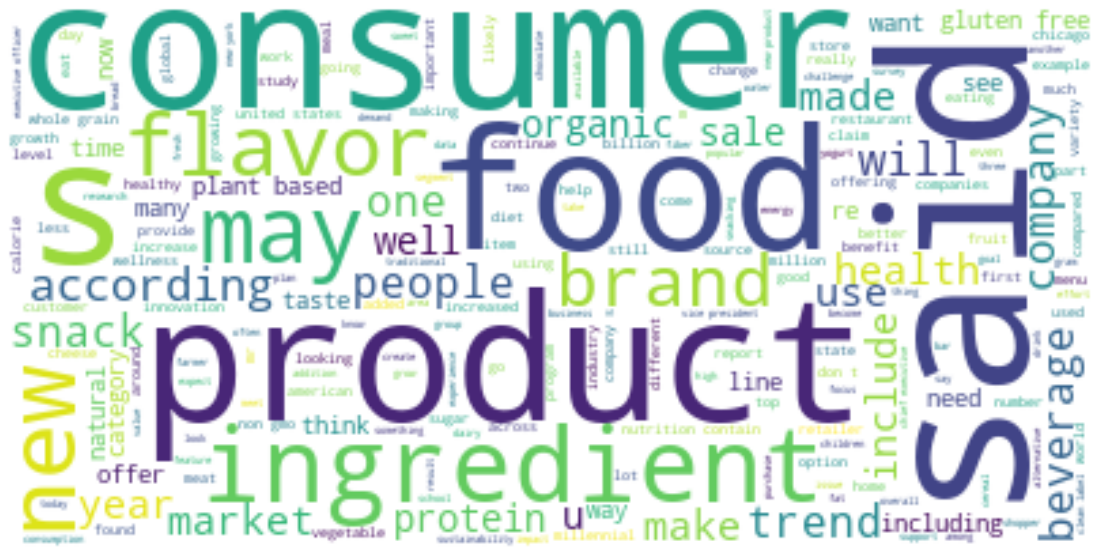

In [399]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df_clean['article_text_processed'].values))


stopwords = set(STOPWORDS)

# Create a WordCloud object
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### Prepare data for LDA Analysis

In [404]:
# Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. 
# We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.


import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['s', 'said', 'consumer', 'product', 'may', 'product', 'chicago'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = df_clean.article_text_processed.tolist()
data_words = list(sent_to_words(data))


# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FaridSarwari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['dairy', 'cheese', 'whether', 'comes', 'cows', 'goats', 'sheep', 'along', 'plant', 'based', 'varieties', 'plentiful', 'winter', 'fancy', 'food', 'show', 'held', 'feb', 'las', 'vegas', 'event', 'marked', 'specialty', 'food', 'association', 'first', 'live', 'trade', 'show', 'two']


In [405]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

2022-08-11 17:57:57,670 | INFO | dictionary.py:199 | add_documents | adding document #0 to Dictionary(0 unique tokens: [])
2022-08-11 17:57:58,670 | INFO | dictionary.py:204 | add_documents | built Dictionary(32737 unique tokens: ['able', 'accompanying', 'according', 'accounted', 'add']...) from 2282 documents (total 739608 corpus positions)
2022-08-11 17:57:58,671 | INFO | utils.py:447 | add_lifecycle_event | Dictionary lifecycle event {'msg': "built Dictionary(32737 unique tokens: ['able', 'accompanying', 'according', 'accounted', 'add']...) from 2282 documents (total 739608 corpus positions)", 'datetime': '2022-08-11T17:57:58.671737', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'created'}


[(0, 1), (1, 1), (2, 3), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 3), (28, 1), (29, 1)]


In [553]:
from pprint import pprint

# number of topics
num_topics = 100

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

2022-08-11 22:08:34,279 | INFO | ldamodel.py:576 | init_dir_prior | using symmetric alpha at 0.01
2022-08-11 22:08:34,283 | INFO | ldamodel.py:576 | init_dir_prior | using symmetric eta at 0.01
2022-08-11 22:08:34,294 | INFO | ldamodel.py:481 | __init__ | using serial LDA version on this node
2022-08-11 22:08:34,642 | INFO | ldamulticore.py:244 | update | running online LDA training, 100 topics, 1 passes over the supplied corpus of 2282 documents, updating every 14000 documents, evaluating every ~2282 documents, iterating 50x with a convergence threshold of 0.001000
2022-08-11 22:08:34,643 | WARNING | ldamulticore.py:253 | update | too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2022-08-11 22:08:34,648 | INFO | ldamulticore.py:285 | update | training LDA model using 7 processes
2022-08-11 22:09:22,193 | INFO | ldamulticore.py:300 | update | PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/2282, outsta

[(6,
  '0.014*"food" + 0.005*"products" + 0.005*"also" + 0.005*"company" + '
  '0.004*"year" + 0.004*"consumers" + 0.004*"whole" + 0.003*"foods" + '
  '0.003*"ingredients" + 0.003*"new"'),
 (27,
  '0.009*"consumers" + 0.008*"products" + 0.008*"food" + 0.007*"new" + '
  '0.007*"foods" + 0.005*"also" + 0.004*"protein" + 0.004*"ms" + '
  '0.004*"company" + 0.004*"sugar"'),
 (83,
  '0.017*"products" + 0.011*"food" + 0.011*"consumers" + 0.008*"natural" + '
  '0.007*"new" + 0.005*"ingredients" + 0.005*"health" + 0.004*"organic" + '
  '0.004*"foods" + 0.004*"flavors"'),
 (47,
  '0.012*"consumers" + 0.009*"food" + 0.008*"products" + 0.006*"foods" + '
  '0.006*"new" + 0.005*"mr" + 0.004*"company" + 0.004*"also" + 0.004*"health" '
  '+ 0.004*"whole"'),
 (70,
  '0.022*"food" + 0.006*"consumers" + 0.005*"products" + 0.005*"brand" + '
  '0.005*"protein" + 0.005*"ingredients" + 0.005*"us" + 0.004*"new" + '
  '0.004*"year" + 0.004*"also"'),
 (61,
  '0.007*"ingredients" + 0.006*"flavor" + 0.006*"foods

In [554]:
from pprint import pprint
# display topics
pprint(lda_model.show_topics(formatted=False))

[(18,
  [('food', 0.0122068515),
   ('company', 0.007337395),
   ('foods', 0.007141199),
   ('products', 0.0061683576),
   ('consumers', 0.006094034),
   ('new', 0.0058026393),
   ('free', 0.004250277),
   ('also', 0.0042437133),
   ('sales', 0.0040880856),
   ('mr', 0.004034411)]),
 (20,
  [('food', 0.008321387),
   ('new', 0.0069902763),
   ('products', 0.0066409004),
   ('consumers', 0.0061678244),
   ('based', 0.0056162444),
   ('organic', 0.0052784304),
   ('company', 0.004091905),
   ('also', 0.0037002254),
   ('oil', 0.0035563614),
   ('use', 0.0035078104)]),
 (79,
  [('food', 0.023843298),
   ('consumers', 0.008525941),
   ('products', 0.0067506065),
   ('ms', 0.004905129),
   ('foods', 0.0047361786),
   ('new', 0.0047032335),
   ('according', 0.004596364),
   ('ingredients', 0.0043458175),
   ('year', 0.004264002),
   ('health', 0.0040780623)]),
 (46,
  [('food', 0.012844611),
   ('ingredients', 0.0067756833),
   ('products', 0.006423857),
   ('new', 0.0055221836),
   ('ms', 0

In [557]:
# only need tagger, no need for parser and named entity recognizer, for faster implementation
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# get stopwords from nltk library
stop_words = nltk.corpus.stopwords.words('english')

def process_words(texts, stop_words=stop_words, allowed_tags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    
    """Convert a document into a list of lowercase tokens, build bigrams-trigrams, implement lemmatization"""
    
    # remove stopwords, short tokens and letter accents 
    texts = [[word for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words] for doc in texts]
    
    # bi-gram and tri-gram implementation
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    
    texts_out = []
    
    # implement lemmatization and filter out unwanted part of speech tags
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_tags])
    
    # remove stopwords and short tokens again after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words] for doc in texts_out]    
    
    return texts_out

In [560]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=lda_model, texts=df_clean['article_text_processed'], dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('Coherence Score: ', coherence_ldamallet)

2022-08-11 22:19:44,434 | INFO | probability_estimation.py:155 | p_boolean_sliding_window | using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2022-08-11 22:20:24,833 | INFO | text_analysis.py:529 | terminate_workers | 7 accumulators retrieved from output queue
2022-08-11 22:20:24,912 | INFO | text_analysis.py:551 | merge_accumulators | accumulated word occurrence stats for 0 virtual documents
C:\Users\FaridSarwari\anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:202: RuntimeWarning: invalid value encountered in true_divide
  numerator = (co_occur_count / num_docs) + EPSILON
C:\Users\FaridSarwari\anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:203: RuntimeWarning: invalid value encountered in true_divide
  denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)
C:\Users\FaridSarwari\anaconda3\lib\site-packages\gensim\topic_coherence\direct_conf

Coherence Score:  nan


In [443]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

from pprint import pprint

import spacy

import pickle
import re 
import pyLDAvis


import matplotlib.pyplot as plt 
import pandas as pd

In [444]:
pro_text = df_clean['article_text_processed']

In [445]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=pro_text, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=pro_text, start=2, limit=40, step=4)

# Show graph
limit=40; start=2; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

AttributeError: module 'gensim.models' has no attribute 'wrappers'

In [434]:
best_result_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[best_result_index]
# Select the model and print the topics
model_topics = optimal_model.show_topics(formatted=False)
print(f'''The {x[best_result_index]} topics gives the highest coherence score \\
of {coherence_values[best_result_index]}''')

NameError: name 'coherence_values' is not defined

In [433]:
def convertldaGenToldaMallet(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha, eta=0,
    )
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

optimal_model = convertldaGenToldaMallet(optimal_model)

NameError: name 'optimal_model' is not defined

In [427]:
import os
from gensim.models import LdaModel

os.getcwd()

'C:\\Users\\FaridSarwari\\OneDrive - BlueGem Capital Partners LLP\\Desktop\\Bluegem'

In [ ]:
# Build LDA model
lda_model = LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=10, 
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [423]:
import pyLDAvis
import pyLDAvis.gensim_models
import pickle

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(LdaModel, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

AttributeError: type object 'LdaModel' has no attribute 'num_topics'

#### TF-IDF with scikit-learn

In [319]:
# importing the necessary libraries

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from nltk.corpus import stopwords
from pathlib import Path  
import glob

In [320]:
text_files  =df_clean['article_text']

In [321]:
text_titles = df_clean['article_header']

In [322]:
index = df_clean['article_date_published']

In [323]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

In [324]:
tfidf_vector = tfidf_vectorizer.fit_transform(text_files)

In [361]:
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=index, columns=tfidf_vectorizer.get_feature_names())

C:\Users\FaridSarwari\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [362]:
tfidf_df.loc['00_Document Frequency'] = (tfidf_df > 0).sum()

In [363]:
tfidf_df

,00,000,0000,001,002,003,005,006,007,008,...,zubi,zucchini,zuke,zume,zurich,zuromski,zutell,éclair,über,ﬁtness
article_date_published,,,,,,,,,,,,,,,,,,,,,
2022-02-21 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-10 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-26 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-04 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-26 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-05 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-08-15 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-08-22 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [364]:
tfidf_df = tfidf_df.drop('00_Document Frequency', errors='ignore')

In [365]:
tfidf_df = tfidf_df.stack().reset_index()

In [368]:
tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document','level_1': 'term'})

In [369]:
tfidf_df

,article_date_published,term,tfidf
0,2022-02-21,00,0.0
1,2022-02-21,000,0.0
2,2022-02-21,0000,0.0
3,2022-02-21,001,0.0
4,2022-02-21,002,0.0
...,...,...,...
64518981,2012-08-22,zuromski,0.0
64518982,2012-08-22,zutell,0.0
64518983,2012-08-22,éclair,0.0
64518984,2012-08-22,über,0.0


In [370]:
tfidf_df.sort_values(by=['article_date_published', 'term'], ascending=[True,False]).groupby(['article_date_published']).head(10)

,article_date_published,term,tfidf
64405893,2012-08-08,ﬁtness,0.0
64405892,2012-08-08,über,0.0
64405891,2012-08-08,éclair,0.0
64405890,2012-08-08,zutell,0.0
64405889,2012-08-08,zuromski,0.0
...,...,...,...
28267,2022-02-21,zurich,0.0
28266,2022-02-21,zume,0.0
28265,2022-02-21,zuke,0.0
28264,2022-02-21,zucchini,0.0
